# CREATING EMAIL TEMPLATES WITH THE USE OF NLP, BY SCRAPING THE WEB 

##### @author: Kiran B

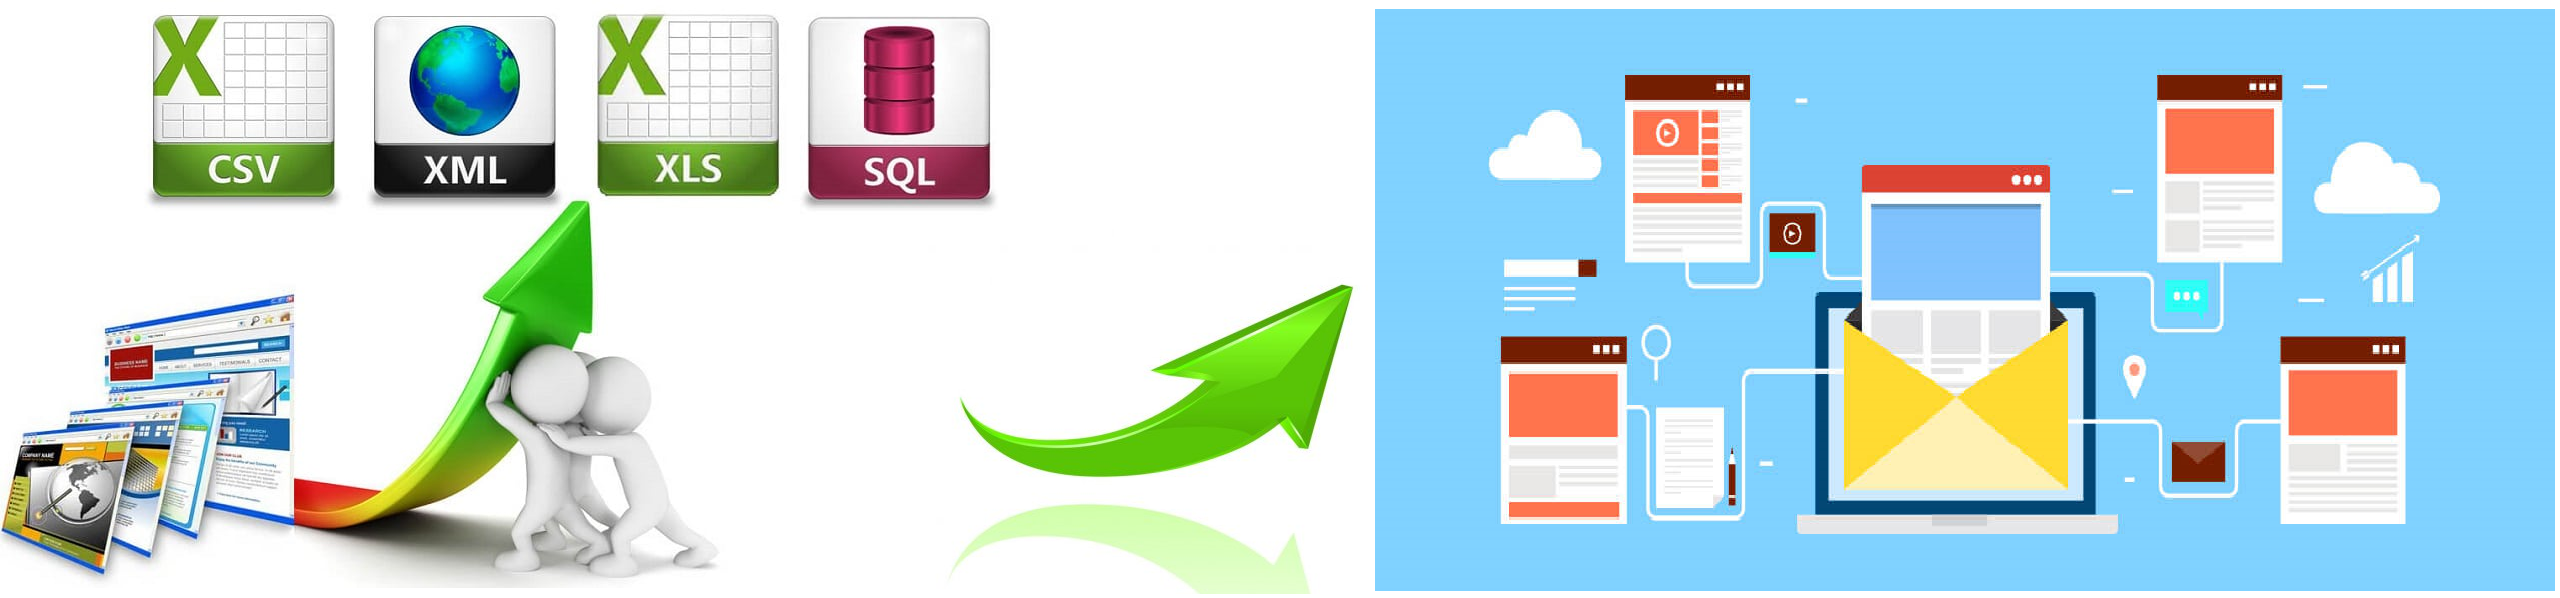

In [1]:
from IPython import display
display.Image("WebScraping_EmailTemplate.png")

### Business Objective:
### To get the nearest email template required by the user based on the key input specified by the user.

### To achieve this, we scrape the web for the email examples based on the user input and apply the neccesary NLP techniques to generate a template, which will be inturn returned to the user

In [2]:
from bs4 import BeautifulSoup #converts the contents of a page into a proper format
import requests #used to get the content from a web page
import spacy
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

In [3]:
# !python -m spacy download en_core_web_trf

### Defining Functions for Webscraping and Text Visualization

In [4]:
def Webscrape_divID(URL, div_id):
    '''This function scrapes the website from the URL given to it.\
    It collects the entire website data and stores the data in the html format \
    Also it extracts the data segment based on the div_id'''
    
    HEADERS = ({'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36','Accept-Language': 'en-US, en;q=0.5'})
    
    # Making the HTTP Request
    webpage = requests.get(URL, headers=HEADERS)
  
    # Creating the Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")        
    
    results = soup.find(id=div_id)
    
    print(results)
    
    print(results.get_text())
    
    #print ([token.text for token in results.get_text()])
    
    return results.get_text()

In [5]:
def Webscrape_Classname(URL, classname):
    
    '''This function scrapes the website from the URL given to it.\
    It collects the entire website data and stores the data in the html format \
    Also it extracts the data segment based on the classname'''
    
    HEADERS = ({'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36','Accept-Language': 'en-US, en;q=0.5'})
    
    # Making the HTTP Request
    webpage = requests.get(URL, headers=HEADERS)
  
    # Creating the Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")
   
    results = soup.find("div", class_= classname)
    
    print(results.get_text())
    
    return results.get_text()

In [6]:
def Word_Frequency(spacy_text):
    '''Visualize the count of Word(Noun and Verb) frequencies in the extracted text'''
    
    #Filtering for nouns and verbs only
    nouns_verbs = [token.text for token in spacy_text if token.pos_ in ('NOUN', 'VERB')]
    
    cv = CountVectorizer()
    X = cv.fit_transform(nouns_verbs)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    wf_df = pd.DataFrame(words_freq)
    
    wf_df.columns = ['word', 'count']
    
    sns.set(rc={'figure.figsize':(12,8)})
    sns.barplot(x = 'count', y = 'word', data = wf_df, palette="GnBu_r")
    
    print("\n\nTop Ten Word Count(Noun & Verb):\n", wf_df[0:10])

In [7]:
def Macro_Visualize(spacy_text):
    '''Visualize the entire extracted data using Parse Trees'''
    
    spacy.displacy.render(spacy_text, style="dep", jupyter=True, options={'compact':True, 'color':"BLUE"})

In [8]:
def Micro_Visualize(spacy_text):
    '''Visualize the extracted data sentence by sentence using Parse Trees'''
    
    sentence_spans = list(spacy_text.sents)
    spacy.displacy.render(sentence_spans, style="dep", jupyter=True, compact=True, options={'distance':160})

In [9]:
def POS_Tag(spacy_text):
    '''Tag Parts of Speech to the Extracted data and visualize'''
    
    spacy.displacy.render(spacy_text, style='ent', jupyter=True)

In [10]:
def Token_Attributes(spacy_text):
    '''Attributes of the tokens from the extracted words'''
    
    print("\n\nToken Attributes:")
    for token in spacy_text:
        print ("\n",token, token.idx, token.is_alpha, token.is_punct, token.is_space, token.shape_, token.is_stop)

In [11]:
def POS_Attributes(spacy_text):
    '''Printing stopwords and attributes of the tokens'''
    
    # Print out all the named entities that were detected
    print("\n\n*Tagged POS entities of the Extracted Text*\n")
    for entity in spacy_text.ents:
        print(f"{entity.text} ({entity.label_})")
    
    # Print the extracted text without any stopwords
    no_stopword = [token for token in spacy_text if not token.is_stop]
    print ("\n\n*List without any Stopwords*:\n", no_stopword)
    print("\n\n")

In [12]:
def Replace_Content1(token):
    '''Find and replace selected tokens for Usecase 1'''
    
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'John Dooley':
        return '[Your Name]\n'
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'John':
        return '\n[Your Name]'
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Jennifer':
        return "[Your Manager's Name]"
    if token.ent_iob != 0 and token.ent_type_ == 'DATE':
        return '[Date]'
    return token.text

def FindnReplace1(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content1, nlp_doc)
    return ' '.join(tokens)

In [13]:
def Replace_Content1a(token):
    '''Find and replace selected tokens for Usecase 1a'''
    
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'William J. Jones':
        return '[Your Name]'
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'William Jones':
        return '[Your Signature on the Hard copy]'
    if token.ent_iob != 0 and token.ent_type_ == 'ORG':
        return '[Your Company Name]'
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Perez':
        return "[Your Manager's Name]"
    if token.ent_iob !=0 and token.ent_type_ == 'DATE' and token.text == 'between now and September 1, 2013':
        return "before [Your task completion timeline]"
    if token.ent_iob !=0 and token.ent_type_ == 'DATE' and token.text == 'September 1, 2013 through September 21, 2013':
        return "[From Date] through [To Date]"
    if token.ent_iob != 0 and token.ent_type_ == 'GPE':
        return '[Place/Country name]'
    if token.text == "Mr.":
        return '\b'
    if token.text == "cruise":
        return '\b'
    if token.text == "wife":
        return "[self/companion/friend]"
    
    return token.text

def FindnReplace1a(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content1a, nlp_doc)
    return ' '.join(tokens)

In [14]:
def Replace_Content2(token):
    '''Find and replace selected tokens for Usecase 2'''
    
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and (token.text == 'Joe' or token.text == 'Joe Brown'):
        return '[Your Name]'
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Steve':
        return "[Your Manager's Name]"
    if token.ent_iob != 0 and token.ent_type_ == 'DATE':
        return '[Sickness Date]'
    if token.ent_iob != 0 and token.ent_type_ == 'ORG':
        return '[Hospital/Clinic Name]'
    if token.text == 'Joejoe.brown765@email.com555':
        return '\n[Your Name]\n[Your Email ID]'
    if token.text == '555':
        return '\n[Your Contact'
    if token.text == '5555':
        return 'Number]'
    return token.text

def FindnReplace2(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content2, nlp_doc)
    return ' '.join(tokens)

In [15]:
def Replace_Content2a(token):
    '''Find and replace selected tokens for Usecase 2a'''
    
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Jane':
        return '\n[Your Name]'
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Jane Doe':
        return '[Your Name]'
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and (token.text == 'Patricia' or token.text == 'Tom'):
        return "[Your Colleague's Name]"
    if token.ent_iob != 0 and token.ent_type_ == 'DATE' and token.text == 'Friday':
        return "on [Meeting day]"
    if token.ent_iob != 0 and token.ent_type_ == 'DATE':
        return '[Sickness Date]'
    return token.text

def FindnReplace2a(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content2a, nlp_doc)
    return ' '.join(tokens)

In [16]:
def Replace_Content3(token):
    '''Find and replace selected tokens for Usecase 3'''
    
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Smith':
        return "[Your Colleague's Name]"
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Jonny\n':
        return "\n [Your Name]\n [Your Designation]"
    if token.text == "Formal":
        return 'Formal Birthday Wishes'
    if token.text == "Mr.":
        return ''
    return token.text

def FindnReplace3(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content3, nlp_doc)
    return ' '.join(tokens)

In [17]:
def Replace_Content3a(token):
    '''Find and replace selected tokens for Usecase 3a'''
    
    if token.text == "company!Have":
        return 'company!\n Have'
    return token.text

def FindnReplace3a(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content3a, nlp_doc)
    return ' '.join(tokens)

In [18]:
def Replace_Content4(token):
    '''Find and replace selected tokens for Usecase 4'''
    
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Paul JonesPhoneEmail':
        return "\n\n Regards,\n [Your Name]\n [Your Contact No.]\n [Your Email ID]\n"
    if token.ent_iob != 0 and token.ent_type_ == 'DATE':
        return "[Years of Experience]"
    if token.text == "Address":
        return ""
    if token.text == "store":
        return "\b"
    if token.text == "retail":
        return "\b"
    
    return token.text

def FindnReplace4(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content4, nlp_doc)
    return ' '.join(tokens)

In [19]:
def Replace_Content4a(token):
    '''Find and replace selected tokens for Usecase 4a'''
    
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and (token.text == 'Mary Garcia12' or token.text == 'Mary Garcia'):
        return "[Your Name]"
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Lee':
        return "[Hiring Manager's Name]"
    if token.text == "Lee":
        return "\n [Hiring Manager's Name]\n"
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Franklin Lee':
        return "To: [Hiring Manager's Name]"
    if token.ent_iob != 0 and token.ent_type_ == 'DATE' and token.text == 'five years':
        return "[Your experience in years]"
    if token.ent_iob != 0 and token.ent_type_ == 'DATE':
        return "[Mailing Date]\n"
    if token.ent_iob != 0 and token.ent_type_ == 'ORG' and token.text == 'CBI Industries39':
        return "[Company Name]"
    if token.ent_iob != 0 and token.ent_type_ == 'ORG':
        return "[Your leaving Company name]"
    if token.ent_iob != 0 and token.ent_type_ == 'GPE' and token.text == 'AvenueTownville':
        return "[Building No., Street Name]"
    if token.ent_iob != 0 and token.ent_type_ == 'GPE' and token.text == 'New Hampshire':
        return "\n [Area Name, Town Name, Pincode]\n"
    if token.ent_iob != 0 and token.ent_type_ == 'GPE':
        return "[Campus Name]"
    if token.text == 'Rogers':
        return "\n"
    if token.text == "Mr.":
        return ""
    if token.text == "03060":
        return "\n"
    if token.text == "Sincerely":
        return "\n\n Sincerely"
    if token.text == "Signature":
        return "\n [Signature]"
    return token.text

def FindnReplace4a(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content4a, nlp_doc)
    return ' '.join(tokens)

In [20]:
def Replace_Content5(token):
    '''Find and replace selected tokens for Usecase 5'''
    
    if token.text == ",":
        return ""
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Amy':
        return "[Your Colleague's Name],\n"
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Jonathan':
        return "\n [Your Name]\n [Your Designation]"
    if token.text == "Sincerely":
        return "\n Sincerely,"
    if token.ent_iob != 0 and token.ent_type_ == 'DATE':
        return "[Timeline] and [Reason for Appreciation]"
    return token.text

def FindnReplace5(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content5, nlp_doc)
    return ' '.join(tokens)

In [21]:
def Replace_Content5a(token):
    '''Find and replace selected tokens for Usecase 5a'''
    
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'John':
        return "[Your Colleague's Name]"
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Samantha':
        return "\n [Your Name]\n [Your Designation]"
    if token.text == "Best":
        return "Best Regards"
    if token.text == 'project':
        return "[Work of Appreciation]"
    return token.text

def FindnReplace5a(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content5a, nlp_doc)
    return ' '.join(tokens)

In [22]:
def Replace_Content6(token):
    '''Find and replace selected tokens for Usecase 6'''
    
    if token.text == ",":
        return ""
    if token.text == "Hello":
        return "Dear [Sender's Name],\n"
    if token.text == "COLLEAGUE":
        return "[Your Colleague's Name]"
    if token.text == "Regards":
        return "\n Regards,"
    if token.text == "NAME":
        return "\n\n [Your Name]"
    if token.text == "do":
        return "don't"
    if token.text == "n’t":
        return "\b"
    return token.text

def FindnReplace6(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content6, nlp_doc)
    return ' '.join(tokens)

In [23]:
def Replace_Content6a(token):
    '''Find and replace selected tokens for Usecase 6a'''
    
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Jane Doe':
        return "[Your Colleague's Name]"
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'John Smith':
        return "\n [Your Name]"
    if token.ent_iob != 0 and token.ent_type_ == 'DATE':
        return "[Your Return Date]"
    if token.text == "Thank":
        return "Dear [Sender's Name],\n\n\t Thank"
    if token.text == "She":
        return "He/She"
    return token.text

def FindnReplace6a(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content6a, nlp_doc)
    return ' '.join(tokens)

In [24]:
def Replace_Content7(token):
    '''Find and replace selected tokens for Usecase 7'''
    
    if token.text == ",":
        return ""
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Sam':
        return "[Your Partner's Name],\n\n"
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'Jonathan':
        return "\n\n[Your Name]\n[Your Contact Number]"
    if token.text == "Please":
        return "\nPlease"
    if token.text == "Thank":
        return "\nThank"
    if token.text == "again!Sincerely":
        return "\b\b, again!\nSincerely,"
    return token.text

def FindnReplace7(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content7, nlp_doc)
    return ' '.join(tokens)

In [25]:
def Replace_Content7a(token):
    '''Find and replace selected tokens for Usecase 7a'''
    
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON' and token.text == 'James':
        return "[Your Colleague's Name]"
    if token.ent_iob != 0 and token.ent_type_ == 'DATE' and token.text == 'a whole year':
        return "[Number of years]"
    if token.text == "at":
        return ""
    return token.text

def FindnReplace7a(nlp_doc):
    with nlp_doc.retokenize() as retokenizer:
        for ent in nlp_doc.ents:
            retokenizer.merge(ent)
    tokens = map(Replace_Content7a, nlp_doc)
    return ' '.join(tokens)

### Obtaining the email type input from the user

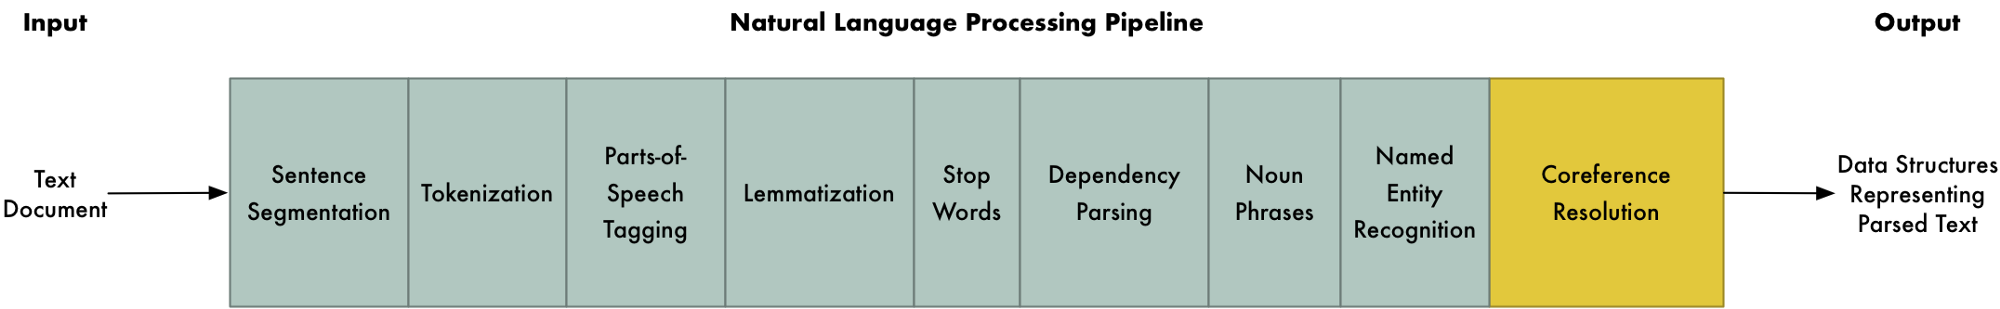

In [26]:
display.Image("NLP_Pipeline.png")

In [27]:
def Collect_Input():
    print("    1. Vacation Leave Email Template\n\
    2. Sick Leave Email Template\n\
    3. Birthday Wishes Email Template\n\
    4. Cover Letter Email Template\n\
    5. Employee work appreciation Email Template\n\
    6. Out of Office Email Template\n\
    7. Thank you note for Business Email Template\n\n")

    val = input("Enter your desired category(1-7) for the Email Template:\n>>> ")
    return val

    1. Vacation Leave Email Template
    2. Sick Leave Email Template
    3. Birthday Wishes Email Template
    4. Cover Letter Email Template
    5. Employee work appreciation Email Template
    6. Out of Office Email Template
    7. Thank you note for Business Email Template




Enter your desired category(1-7) for the Email Template:
>>>  5



You have chosen to generate an Employee Work Appreciation Email Template:




Keywords:
 tremendous, busy, appreciated, effort, depend, exceptional, satisfied, contributions




Please enter a keyword from the above list to generate the Template:

>>> effort


<div class="comp mntl-sc-block-callout-body mntl-text-block" id="mntl-sc-block-callout-body_1-0-4">
<p><strong>Subject Line:</strong> Thank You Very Much!</p><p>Dear John,</p><p>I wanted to let you know how much I appreciated your help with the project.</p><p>I know how much time and effort you invested to not only get the project done prior to the deadline, but to ensure the client was satisfied with every step of the process.</p><p>You are a valued member of our team, and I truly appreciate your contributions!</p><p>Best,</p><p>Samantha</p></div>

Subject Line: Thank You Very Much!Dear John,I wanted to let you know how much I appreciated your help with the project.I know how much time and effort you invested to not only get the project done prior to the deadline, but to ensure the client was satisfied with every step of the process.You are a valued member of our team, and I truly appreciate your contributions!Best,Samantha


Top Ten Word Count(Noun & Verb):
           word  count
0  



*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*

John 41 45 PERSON People, including fictional
Samantha 382 390 PERSON People, including fictional


****Here is your Template for Employee Work Appreciation Email****

 
 Subject Line : Thank You Very Much ! 
 Dear [Your Colleague's Name] , 
	 I wanted to let you know how much I appreciated your help with the [Work of Appreciation] . 
 I know how much time and effort you invested to not only get the [Work of Appreciation] done prior to the deadline , but to ensure the client was satisfied with every step of the process . 
 You are a valued member of our team , and I truly appreciate your contributions ! 

 Best Regards , 
 [Your Name]
 [Your Designation]


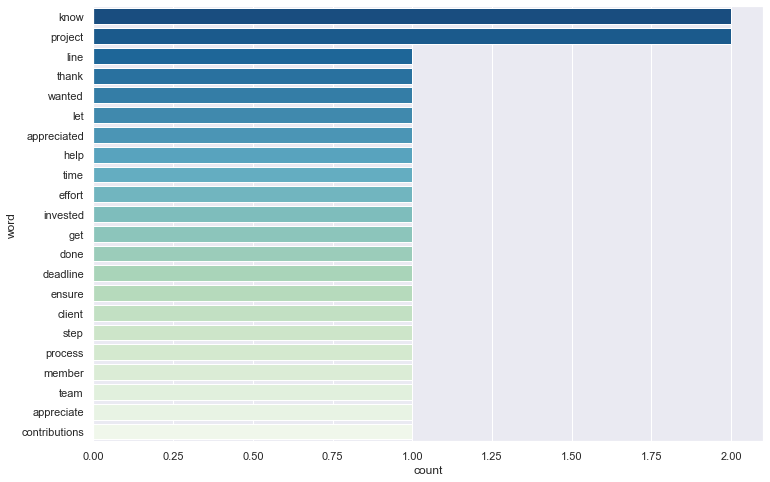

In [28]:
val = int(Collect_Input())
nlp = spacy.load('en_core_web_trf')
    
while val <= 0 or val >= 8:
    print("That is not a valid input. Numbers between 1 and 6 only please!\n\n")
    val = int(Collect_Input())
        
if val == 1:
    print("\nYou have chosen to generate a Vacation Leave Email Template:\n\n")
    
    URL1 = "https://www.thebalancecareers.com/formal-leave-of-absence-letter-request-example-2060597"
    div_id1 = "mntl-sc-block-callout-body_1-0-3"
    URL2 = "https://www.greatsampleresume.com/letters/personal-letters/vacation-leave"
    classname2 = "letter-table"
    
    def Process_URL1():
        extract1 = Webscrape_divID(URL1, div_id1)
        
        phr = "As we discussed"
        temp = extract1.replace(str(phr), "\n\tAs we discussed")
        phr1 = "Dear"
        temp2 = temp.replace(str(phr1), "\nDear") 
        
        # Parse the text with spaCy
        spacy_text1 = nlp(temp2)
    
        Word_Frequency(spacy_text1)
    
        Token_Attributes(spacy_text1)
    
        POS_Attributes(spacy_text1)
    
        # Parse Trees
        Macro_Visualize(spacy_text1)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text1)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text1.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        temp2 = FindnReplace1(spacy_text1)
        
        phr2 = "I plan"
        temp3 = temp2.replace(str(phr2), "\nI plan")
        phr3 = "I would also"
        temp4 = temp3.replace(str(phr3), "\nI would also")
        phr4 = "Thank you"
        temp5 = temp4.replace(str(phr4), "\nThank you")
        phr5 = "Best"
        template1 = temp5.replace(str(phr5), "\n\nBest")
        print("\n\n****Here is your Template for Vacation Leave Email****\n\n", template1)
    
    
    def Process_URL2():
        extract2 = Webscrape_Classname(URL2, classname2)
        
        phr1 = "Yours sincerely,"
        temp1 = extract2.replace(str(phr1), "\nYours sincerely,\n")
        phr2 = "(555)-555-5555"
        temp2 = temp1.replace(str(phr2), "[Your Contact Number]")
        phr3 = "my leave"
        temp3 = temp2.replace(str(phr3), "\b\b\b my leave")
        phr4 = "I think you"
        temp4 = temp3.replace(str(phr4), "\nI think you")
        phr5 = "I am planning"
        temp5 = temp4.replace(str(phr5), "\n\tI am planning")
        phr6 = "If there are"
        temp6 = temp5.replace(str(phr6), "\nIf there are")
        phr7 = "I am writing"
        temp7 = temp6.replace(str(phr7), "\n\tI am writing")
        
        # Parse the text with spaCy
        spacy_text1a = nlp(temp7)
    
        Word_Frequency(spacy_text1a)
    
        Token_Attributes(spacy_text1a)
    
        POS_Attributes(spacy_text1a)
    
        # Parse Trees
        Macro_Visualize(spacy_text1a)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text1a)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text1a.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        temp = FindnReplace1a(spacy_text1a)
        
        phr4 = "Assistant Manager"
        template1a = temp.replace(str(phr4), "[Your Designation]")
        
        print("\n\n****Here is your Template for Vacation Leave Email****\n\n", template1a)
            
    
    def Keyword_Menu():
        print("\n\nKeywords:\n absence, discussed, vacation, formally, approved, assistance, endeavored, trip\n\n")
        keyword = str(input("Please enter a keyword from the above list to generate the Template:\n\n>>>"))
        return keyword
    
    keyword = Keyword_Menu()
    if(keyword.lower() == 'absence' or keyword.lower() == 'discussed' or keyword.lower() == 'approved' or keyword.lower() == 'assistance'):
        Process_URL1()
        
    elif(keyword.lower() == 'vacation' or keyword.lower() == 'formally' or keyword.lower() == 'endeavored' or keyword.lower() == 'trip'):
        Process_URL2()
        
    else:
        print("No such keyword found. Please start over\n")
        
     
    
elif val == 2:
    print("\nYou have chosen to generate a Sick Leave Email Template:\n\n")
    
    URL1 = "https://www.thebalancecareers.com/sample-sickness-absence-excuse-letter-2060603"
    div_id1 = "mntl-sc-block-callout-body_1-0-3"
    URL2 = "https://www.thebalancecareers.com/sample-sickness-absence-excuse-letter-2060603"
    div_id2 = "mntl-sc-block-callout-body_1-0-4"
    
    def Process_URL1():
        extract1 = Webscrape_divID(URL1, div_id1)
        
        phr = "Dear"
        temp = extract1.replace(str(phr), "\n\nDear") 
        phr1 = "I am writing"
        temp1 = temp.replace(str(phr1), "\n\t I am writing")
        phr2 = "Please"
        temp2 = temp1.replace(str(phr2), "\nPlease")
        phr3 = "Regards"
        temp2 = temp2.replace(str(phr3), "\n\nRegards")
        
        # Parse the text with spaCy
        spacy_text2 = nlp(temp2)
    
        Word_Frequency(spacy_text2)
    
        Token_Attributes(spacy_text2)
    
        POS_Attributes(spacy_text2)
    
        # Parse Trees
        Macro_Visualize(spacy_text2)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text2)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text2.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        temp = FindnReplace2(spacy_text2)
    
        phrase = "an acute attack of food poisoning"
        template2 = temp.replace(str(phrase),"[Reason for Sickness]")
    
        print("\n\n****Here is your Template for Sick Leave Email****\n\n", template2)
      
    
    def Process_URL2():
        extract2 = Webscrape_divID(URL2, div_id2)
        
        phr = "Dear"
        temp = extract2.replace(str(phr), "\n\nDear")
        phr1 = "Supervisor Name"
        temp1 = temp.replace(str(phr1), "[Your Manager's Name]")
        phr2 = "I've asked"
        temp2 = temp1.replace(str(phr2), "\nI've asked")
        phr3 = "I've come"
        temp3 = temp2.replace(str(phr3), "\n\tI've come")
        phr4 = "I will try"
        temp4 = temp3.replace(str(phr4), "\nI will try")
        phr5 = "Thank you"
        temp5 = temp4.replace(str(phr5), "\n\nThank you")
        
        # Parse the text with spaCy
        spacy_text2a = nlp(temp5)
    
        Word_Frequency(spacy_text2a)
    
        Token_Attributes(spacy_text2a)
    
        POS_Attributes(spacy_text2a)
    
        # Parse Trees
        Macro_Visualize(spacy_text2a)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text2a)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text2a.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        template2a = FindnReplace2a(spacy_text2a)
    
        print("\n\n****Here is your Template for Sick Leave Email****\n\n", template2a)
        
    
    def Keyword_Menu():
        print("\n\nKeywords:\n document, absence, flu, rest, illness, treatment, recover, prepare\n\n")
        keyword = str(input("Please enter a keyword from the above list to generate the Template:\n\n>>>"))
        return keyword
    
    keyword = Keyword_Menu()
    if(keyword.lower() == 'document' or keyword.lower() == 'absence' or keyword.lower() == 'illness' or keyword.lower() == 'treatment'):
        Process_URL1()
        
    elif(keyword.lower() == 'flu' or keyword.lower() == 'rest' or keyword.lower() == 'recover' or keyword.lower() == 'prepare'):
        Process_URL2()
        
    else:
        print("No such keyword found. Please start over\n")
    

elif val == 3:
    print("\nYou have chosen to generate a Birthday Wishes Email Template:\n\n")
    
    URL1 = "https://www.targettraining.eu/happy-birthday-emails/"
    classname1 = "avia-promocontent"
    URL2 = "https://www.happybirthdaywisher.com/employee/"
    div_id2 = "mensagem-1072"
    
    def Process_URL1():
        extract1 = Webscrape_Classname(URL1, classname1)
        
        phr1 = "I am"
        temp1 = extract1.replace(str(phr1),"\n\tI am")
        
        # Parse the text with spaCy
        spacy_text3 = nlp(temp1)
    
        Word_Frequency(spacy_text3)
    
        Token_Attributes(spacy_text3)
    
        POS_Attributes(spacy_text3)
    
        # Parse Trees
        Macro_Visualize(spacy_text3)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text3)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text3.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        template3 = FindnReplace3(spacy_text3)
         
        print("\n\n****Here is your Template for Birthday Wishes Email****\n\n", template3)
        
        
    def Process_URL2():
        extract2 = Webscrape_divID(URL2, div_id2)
    
        phr1 = "birthday!"
        temp1 = extract2.replace(str(phr1), "birthday!\n\nSincerely,\n[Your Name]\n[Your Designation]")
        phr2 = "Happy"
        temp2 = temp1.replace(str(phr2), "Dear [Your Colleague's Name],\n\tHappy")
        
        
        # Parse the text with spaCy
        spacy_text3a = nlp(temp2)
    
        Word_Frequency(spacy_text3a)
    
        Token_Attributes(spacy_text3a)
    
        POS_Attributes(spacy_text3a)
    
        # Parse Trees
        Macro_Visualize(spacy_text3a)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text3a)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text3a.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        template3a = FindnReplace3a(spacy_text3a)
         
        print("\n\n****Here is your Template for Birthday Wishes Email****\n\n", template3a)
        
    
    def Keyword_Menu():
        print("\n\nKeywords:\n writing, wish, wonderful, positivity, enjoy, returns, expertise, regarded\n\n")
        keyword = str(input("Please enter a keyword from the above list to generate the Template:\n\n>>>"))
        return keyword
    
    keyword = Keyword_Menu()
    if(keyword.lower() == 'writing' or keyword.lower() == 'wish' or keyword.lower() == 'enjoy' or keyword.lower() == 'returns'):
        Process_URL1()
        
    elif(keyword.lower() == 'wonderful' or keyword.lower() == 'positivity' or keyword.lower() == 'expertise' or keyword.lower() == 'regarded'):
        Process_URL2()
        
    else:
        print("No such keyword found. Please start over\n")
        
    
elif val == 4:
    print("\nYou have chosen to generate Cover Letter Email Template:\n\n")
    
    URL1 = "https://www.thebalancecareers.com/email-cover-letter-samples-2060246"
    div_id1 = "mntl-sc-block-callout-body_1-0-1"
    URL2 = "https://www.thebalancecareers.com/how-to-address-a-cover-letter-2060281"
    div_id2 = "mntl-sc-block-callout-body_1-0-5"
    
    def Process_URL1():
        extract1 = Webscrape_divID(URL1, div_id1)
    
        phr1 = "Store Manager Position"
        temp1 = extract1.replace(str(phr1),"[Role you are applying for]")
        
        phr2 = "Your Name"
        temp2 = temp1.replace(str(phr2), "[Your Name]")
        
        phr3 = "Store Manager position"
        temp3 = temp2.replace(str(phr3),"[Role you are applying for]")
        
        phr4 = "Payroll management, scheduling, reports, and inventory control expertise"
        temp4 = temp3.replace(str(phr4),"")
        
        phr5 = "Extensive work with visual standards and merchandising high-ticket items"
        temp5 = temp4.replace(str(phr5),"")
        
        phr6 = "retail management"
        temp6 = temp5.replace(str(phr6),"[Your previous role]")
        
        phr7 = "XYZ Company:"
        temp7 = temp6.replace(str(phr7),"[Company name you are applying for]:\n[Your Skill Set]...for example")
        
        phr8 = "I read"
        temp8 = temp7.replace(str(phr8), "\n\tI read")
        
        phr9 = "Dear"
        temp9 = temp8.replace(str(phr9), "\n\nDear")
        
        phr10 = "I can offer"
        temp10 = temp9.replace(str(phr10), "\nI can offer")
        
        phr11 = "Over"
        temp11 = temp10.replace(str(phr11), "\nOver")
        
        phr12 = "Ability"
        temp12 = temp11.replace(str(phr12), "\nAbility")
        
        phr13 = "In addition"
        temp13 = temp12.replace(str(phr13), "\n\nIn addition")
        
        phr14 = "My broad"
        temp14 = temp13.replace(str(phr14), "\nMy broad")
        
        phr15 = "I look"
        temp15 = temp14.replace(str(phr15), "\nI look")
        
        # Parse the text with spaCy
        spacy_text4 = nlp(temp15)
        
        Word_Frequency(spacy_text4)
    
        Token_Attributes(spacy_text4)
    
        POS_Attributes(spacy_text4)
    
        # Parse Trees
        Macro_Visualize(spacy_text4)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text4)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text4.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        template4 = FindnReplace4(spacy_text4)
         
        print("\n\n****Here is your Template for Cover Letter Email****\n\n", template4)
        
        
    def Process_URL2():
        extract2 = Webscrape_divID(URL2, div_id2)
    
        phr = "Dear"
        temp = extract2.replace(str(phr), "\nDear")
        
        phr1 = "03060555-555-5555mary.garcia@email.com"
        temp1 = temp.replace(str(phr1), "[Your Contact Number and Email ID]\n")
        
        phr2 = "operations assistant/associate"
        temp2 = temp1.replace(str(phr2), "[Role in which you have experience]")
        
        phr3 = "operations assistant"
        temp3 = temp2.replace(str(phr3), "[Role you are applying for]")
        
        phr4 = "orders, resolved customer issues, ordered supplies, and prepared reports"
        temp4 = temp3.replace(str(phr4), "[Your responsibilities at your leaving company]")
        
        phr5 = "bookkeeping, data entry, and sales support"
        temp5 = temp4.replace(str(phr5), "[Your prior job nature]")
        
        phr6 = "Strong communication skills, in person, in writing, and on the phone"
        temp6 = temp5.replace(str(phr6), "\n[Your Skillset]")
        
        phr7 = "Excellent attention to detail and organization skills"
        temp7 = temp6.replace(str(phr7), "-")
        
        phr8 = "Top-notch customer service"
        temp8 = temp7.replace(str(phr8), "-")
        
        phr9 = "Experience in the industry and passion for the product"
        temp9 = temp8.replace(str(phr9), "-")
        
        phr10 = "Adept at all the usual professional software, including Microsoft Office Suite"
        temp10 = temp9.replace(str(phr10), "-")
        
        phr11 = "I’ve included"
        temp11 = temp10.replace(str(phr11), "\n\nI’ve included")
        
        phr12 = "Basically"
        temp12 = temp11.replace(str(phr12), "\nBasically")
        
        phr13 = "I was excited"
        temp13 = temp12.replace(str(phr13), "\n\tI was excited")
        
        phr14 = "CBI Industries39 Main"
        temp14 = temp13.replace(str(phr14), "")
        
        phr15 = "In my most"
        temp15 = temp14.replace(str(phr15), "\nIn my most")
        
        phr16 = "My other"
        temp16 = temp15.replace(str(phr16), "\nMy other")
        
        phr17 = "(hard copy letter)"
        temp17 = temp16.replace(str(phr17), "\n")
        
        
        # Parse the text with spaCy
        spacy_text4a = nlp(temp17)
    
        Word_Frequency(spacy_text4a)
    
        Token_Attributes(spacy_text4a)
    
        POS_Attributes(spacy_text4a)
    
        # Parse Trees
        Macro_Visualize(spacy_text4a)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text4a)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text4a.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        template4a = FindnReplace4a(spacy_text4a)
         
        print("\n\n****Here is your Template for Cover Letter Email****\n\n", template4a)
        
    
    def Keyword_Menu():
        print("\n\nKeywords:\n qualifications, seeking, excited, smoothly, gracious, superior, recent, previous\n\n")
        keyword = str(input("Please enter a keyword from the above list to generate the Template:\n\n>>>"))
        return keyword
    
    keyword = Keyword_Menu()
    if(keyword.lower() == 'qualifications' or keyword.lower() == 'seeking' or keyword.lower() == 'gracious' or keyword.lower() == 'superior'):
        Process_URL1()
        
    elif(keyword.lower() == 'excited' or keyword.lower() == 'smoothly' or keyword.lower() == 'recent' or keyword.lower() == 'previous'):
        Process_URL2()
        
    else:
        print("No such keyword found. Please start over\n")
        
    
elif val ==5:
    print("\nYou have chosen to generate an Employee Work Appreciation Email Template:\n\n")
    
    URL1 = "https://talkroute.com/7-sample-thank-you-notes-for-business/"
    div_id1 = "x-content-band-5"
    URL2 = "https://www.thebalancecareers.com/appreciation-email-samples-2059555"
    div_id2 = "mntl-sc-block-callout-body_1-0-4"
    
    def Process_URL1():
        extract1 = Webscrape_divID(URL1, div_id1)
    
        phr1 = "You showed"
        temp1 = extract1.replace(str(phr1),"\nYou showed")
        
        phr2 = "I am"
        temp2 = temp1.replace(str(phr2),"\nI am")
        
        phr3 = "Thank you"
        temp3 = temp2.replace(str(phr3),"\n\tThank you")
        
        # Parse the text with spaCy
        spacy_text5 = nlp(temp3)
        
        Word_Frequency(spacy_text5)
    
        Token_Attributes(spacy_text5)
    
        POS_Attributes(spacy_text5)
    
        # Parse Trees
        Macro_Visualize(spacy_text5)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text5)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text5.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        template5 = FindnReplace5(spacy_text5)
    
        print("\n\n****Here is your Template for Employee Work Appreciation Email****\n\n", template5)
        
        
    def Process_URL2():
        extract2 = Webscrape_divID(URL2, div_id2)
    
        phr1 = "Subject Line: Thank You Very Much!"
        temp1 = extract2.replace(str(phr1), "Subject Line: Thank You Very Much!\n")
        
        phr2 = "I wanted"
        temp2 = temp1.replace(str(phr2), "\n\tI wanted")
        
        phr3 = "I know how"
        temp3 = temp2.replace(str(phr3), "\nI know how")
        
        phr4 = "You are a"
        temp4 = temp3.replace(str(phr4), "\nYou are a")
        
        phr5 = "Best"
        temp5 = temp4.replace(str(phr5), "\n\nBest")
        
        # Parse the text with spaCy
        spacy_text5a = nlp(temp5)
        
        Word_Frequency(spacy_text5a)
    
        Token_Attributes(spacy_text5a)
    
        POS_Attributes(spacy_text5a)
    
        # Parse Trees
        Macro_Visualize(spacy_text5a)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text5a)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text5a.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        template5a = FindnReplace5a(spacy_text5a)
    
        print("\n\n****Here is your Template for Employee Work Appreciation Email****\n\n", template5a)
        
    
    def Keyword_Menu():
        print("\n\nKeywords:\n tremendous, busy, appreciated, effort, depend, exceptional, satisfied, contributions\n\n")
        keyword = str(input("Please enter a keyword from the above list to generate the Template:\n\n>>>"))
        return keyword
    
    keyword = Keyword_Menu()
    if(keyword.lower() == 'tremendous' or keyword.lower() == 'busy' or keyword.lower() == 'depend' or keyword.lower() == 'exceptional'):
        Process_URL1()
        
    elif(keyword.lower() == 'appreciated' or keyword.lower() == 'effort' or keyword.lower() == 'satisfied' or keyword.lower() == 'contributions'):
        Process_URL2()
        
    else:
        print("No such keyword found. Please start over\n")
    
    
elif val == 6:
    print("\nYou have chosen to generate an Out of Office Email Template:\n\n")
    
    URL1 = "https://www.ionos.com/digitalguide/e-mail/technical-matters/perfect-out-of-office-message-examples-and-templates/"
    div_id1 = "c118391"
    URL2 = "https://www.tenfold-security.com/en/outlook-out-of-office-different-user/"
    classname2 = "fusion-reading-box-container reading-box-container-2"
    
    def Process_URL1():
        extract1 = Webscrape_divID(URL1, div_id1)
    
        phrase = "Formal out of office reply with referral for customers"
        temp = extract1.replace(str(phrase),"")
        
        phr1 = "Feel free"
        temp1 = temp.replace(str(phr1),"\nFeel free")
        
        phr2 = "You can"
        temp2 = temp1.replace(str(phr2),"\nYou can")
        
        phr3 = "Thank you"
        temp3 = temp2.replace(str(phr3),"\nThank you")
        
        phr4 = "Thank you for your message"
        temp4 = temp3.replace(str(phr4), "\tThank you for your message")
        
        # Parse the text with spaCy
        spacy_text6 = nlp(temp4)
        
        Word_Frequency(spacy_text6)
    
        Token_Attributes(spacy_text6)
    
        POS_Attributes(spacy_text6)
    
        # Parse Trees
        Macro_Visualize(spacy_text6)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text6)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text6.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
         # Generate Template
        temp1 = FindnReplace6(spacy_text6)
        
        phr = "MM / DD / YY"
        temp2 = temp1.replace(str(phr), "[Your Date of Return]")
        
        phr1 = "( colleague@example.com )"
        temp3 = temp2.replace(str(phr1), "[Your Colleague's Email ID]")
        
        phr2 = "( XXX - XXXX )"
        template6 = temp3.replace(str(phr2), "[Your Colleague's Contact No.]")
         
        print("\n\n****Here is your Template for Out of Office Email****\n\n", template6)
        
        
    def Process_URL2():
        extract2 = Webscrape_Classname(URL2, classname2)
    
        phr1 = "(555-555-1234)"
        temp1 = extract2.replace(str(phr1), "[Your Colleague's Phone Number]")
        
        phr2 = "(jane.doe@example.com)"
        temp2 = temp1.replace(str(phr2), "[Your Colleague's Email ID]")
        
        phr3 = "In urgent"
        temp3 = temp2.replace(str(phr3), "\nIn urgent")
        
        phr4 = "Your message"
        temp4 = temp3.replace(str(phr4), "\nYour message")
        
        # Parse the text with spaCy
        spacy_text6a = nlp(temp4)
        
        Word_Frequency(spacy_text6a)
    
        Token_Attributes(spacy_text6a)
    
        POS_Attributes(spacy_text6a)
    
        # Parse Trees
        Macro_Visualize(spacy_text6a)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text6a)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text6a.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        template6a = FindnReplace6a(spacy_text6a)
    
        print("\n\n****Here is your Template for Out of Office Email****\n\n", template6a)
        
    
    def Keyword_Menu():
        print("\n\nKeywords:\n access, represent, respond, urgent, assist, understanding, matters, forwarded\n\n")
        keyword = str(input("Please enter a keyword from the above list to generate the Template:\n\n>>>"))
        return keyword
    
    keyword = Keyword_Menu()
    if(keyword.lower() == 'access' or keyword.lower() == 'represent' or keyword.lower() == 'assist' or keyword.lower() == 'understanding'):
        Process_URL1()
        
    elif(keyword.lower() == 'respond' or keyword.lower() == 'urgent' or keyword.lower() == 'matters' or keyword.lower() == 'forwarded'):
        Process_URL2()
        
    else:
        print("No such keyword found. Please start over\n")
    
    
elif val == 7:
    print("\n\nYou have chosen to generate a Thank you note for Business Email Template:\n\n")
    
    URL1 = "https://talkroute.com/7-sample-thank-you-notes-for-business/"
    div_id1 = "x-content-band-6"
    URL2 = "https://talkroute.com/7-sample-thank-you-notes-for-business/"
    div_id2 = "x-content-band-2"
    
    def Process_URL1():
        extract1 = Webscrape_divID(URL1, div_id1)
        
        # Parse the text with spaCy
        spacy_text7 = nlp(extract1)
    
        Word_Frequency(spacy_text7)
    
        Token_Attributes(spacy_text7)
    
        POS_Attributes(spacy_text7)
    
        # Parse Trees
        Macro_Visualize(spacy_text7)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text7)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text7.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        template7 = FindnReplace7(spacy_text7)
         
        print("\n\n****Here is your Email Template for Thank you note for Business****\n\n", template7)
        
        
    def Process_URL2():
        extract2 = Webscrape_divID(URL2, div_id2)
    
        phr1 = "great day!Sincerely"
        temp1 = extract2.replace(str(phr1), "great day!\nSincerely")
        phr2 = "Your friends"
        temp2 = temp1.replace(str(phr2), "\n[Your Name]")
        phr3 = "I’m delighted"
        temp3 = temp2.replace(str(phr3), "\n\tI’m delighted")
        phr4 = "We would"
        temp4 = temp3.replace(str(phr4), "\nWe would")
        phr5 = "You could"
        temp5 = temp4.replace(str(phr5), "\nYou could")
        phr6 = "(your business)"
        temp6 = temp5.replace(str(phr6), "\n[Your Company Name]")
        
        # Parse the text with spaCy
        spacy_text7a = nlp(temp6)
    
        Word_Frequency(spacy_text7a)
    
        Token_Attributes(spacy_text7a)
    
        POS_Attributes(spacy_text7a)
    
        # Parse Trees
        Macro_Visualize(spacy_text7a)
        
        # Parts of Speech Tagging and printing the attributes of the Tagged POS
        POS_Tag(spacy_text7a)
        print("\n\n*Attributes of Tagged POS: Text, Index of Start char, Index of End Char, POS Label, Descriptive Details of POS Label*\n")
        for ent in spacy_text7a.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    
        # Generate Template
        template7a = FindnReplace7a(spacy_text7a)
         
        print("\n\n****Here is your Email Template for Thank you note for Business****\n\n", template7a)
        
    
    def Keyword_Menu():
        print("\n\nKeywords:\n partnership, family, delighted, customer, fruitful, businesses, loyal, patronage\n\n")
        keyword = str(input("Please enter a keyword from the above list to generate the Template:\n\n>>>"))
        return keyword
    
    keyword = Keyword_Menu()
    if(keyword.lower() == 'partnership' or keyword.lower() == 'family' or keyword.lower() == 'fruitful' or keyword.lower() == 'businesses'):
        Process_URL1()
        
    elif(keyword.lower() == 'delighted' or keyword.lower() == 'customer' or keyword.lower() == 'loyal' or keyword.lower() == 'patronage'):
        Process_URL2()
        
    else:
        print("No such keyword found. Please start over\n")
    